# KNN

- KNN can be used for both classsification and regression task.
- KNN is a non linear model.
- KNN is also called lazy algorithm.
- KNN is uses similarity or distance calculation for classification and regression.(Euclidean/Manhattan)
- KNN is computationally very expensive.
- KNN is very easy to implement and interpret.

In [1]:
#Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid',palette='viridis')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#read diabetes data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Describe the data

In [3]:
#describe
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Missing values imputation

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.loc[:,'Glucose':'BMI'] = df.loc[:,'Glucose':'BMI'].replace(0,np.nan)

In [7]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

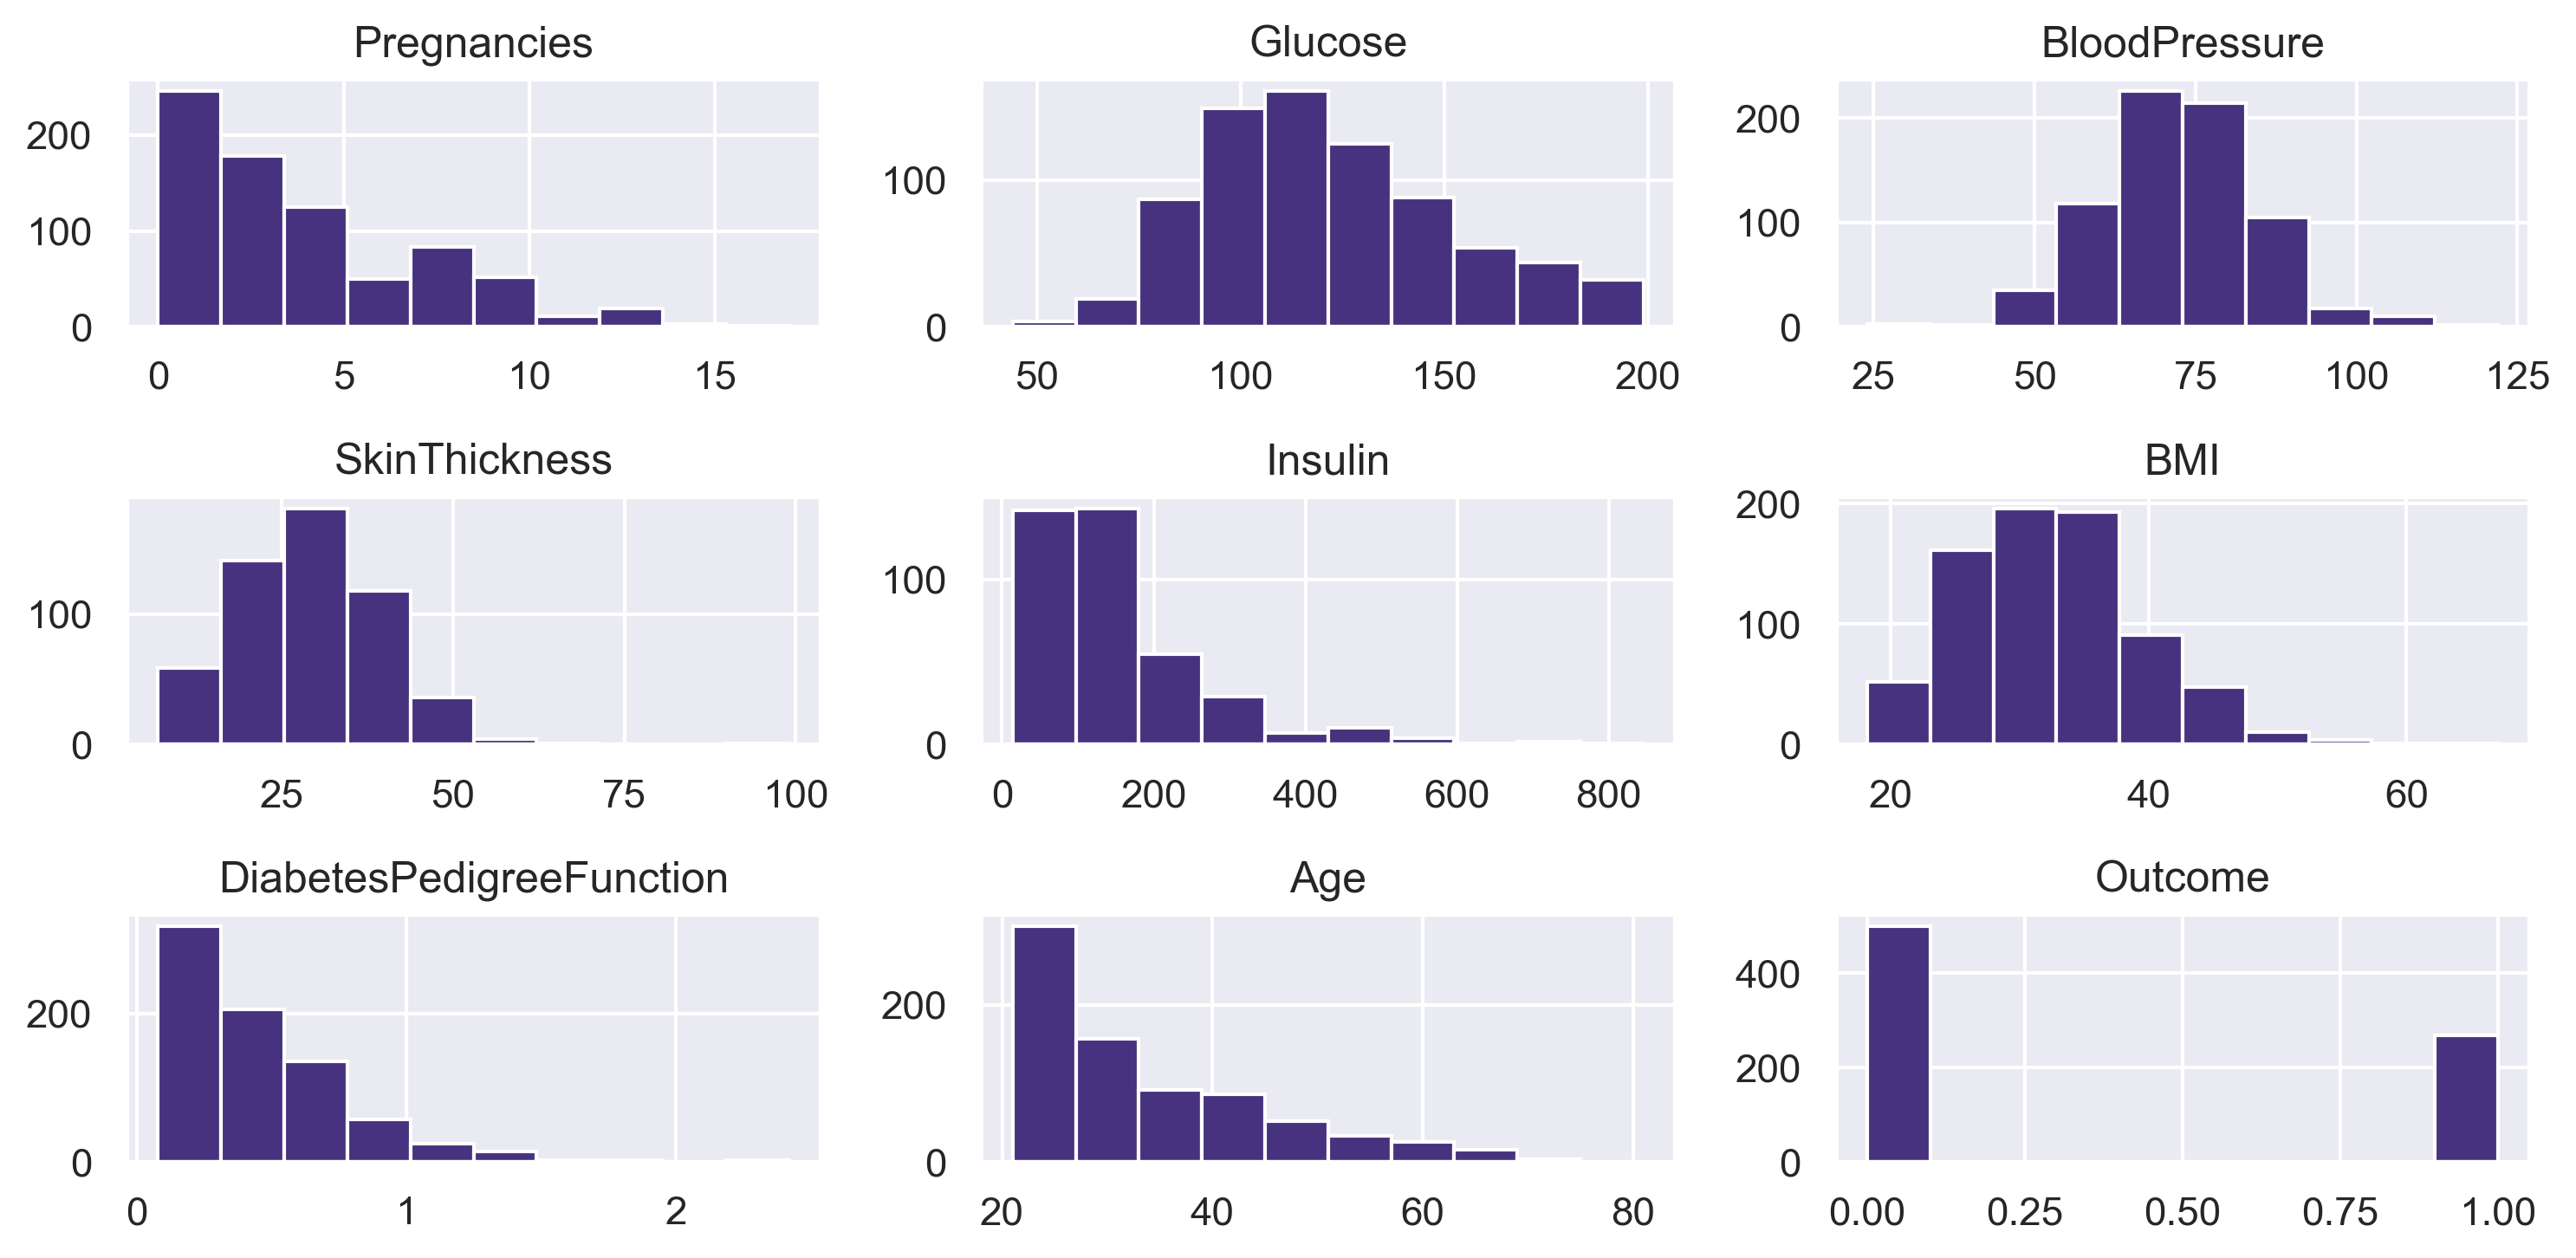

In [9]:
df.hist()
plt.tight_layout()

In [10]:
si = SimpleImputer(strategy='median')

In [11]:
df.loc[:,"Glucose":'BMI'] = si.fit_transform(df.loc[:,"Glucose":'BMI'])

<AxesSubplot:>

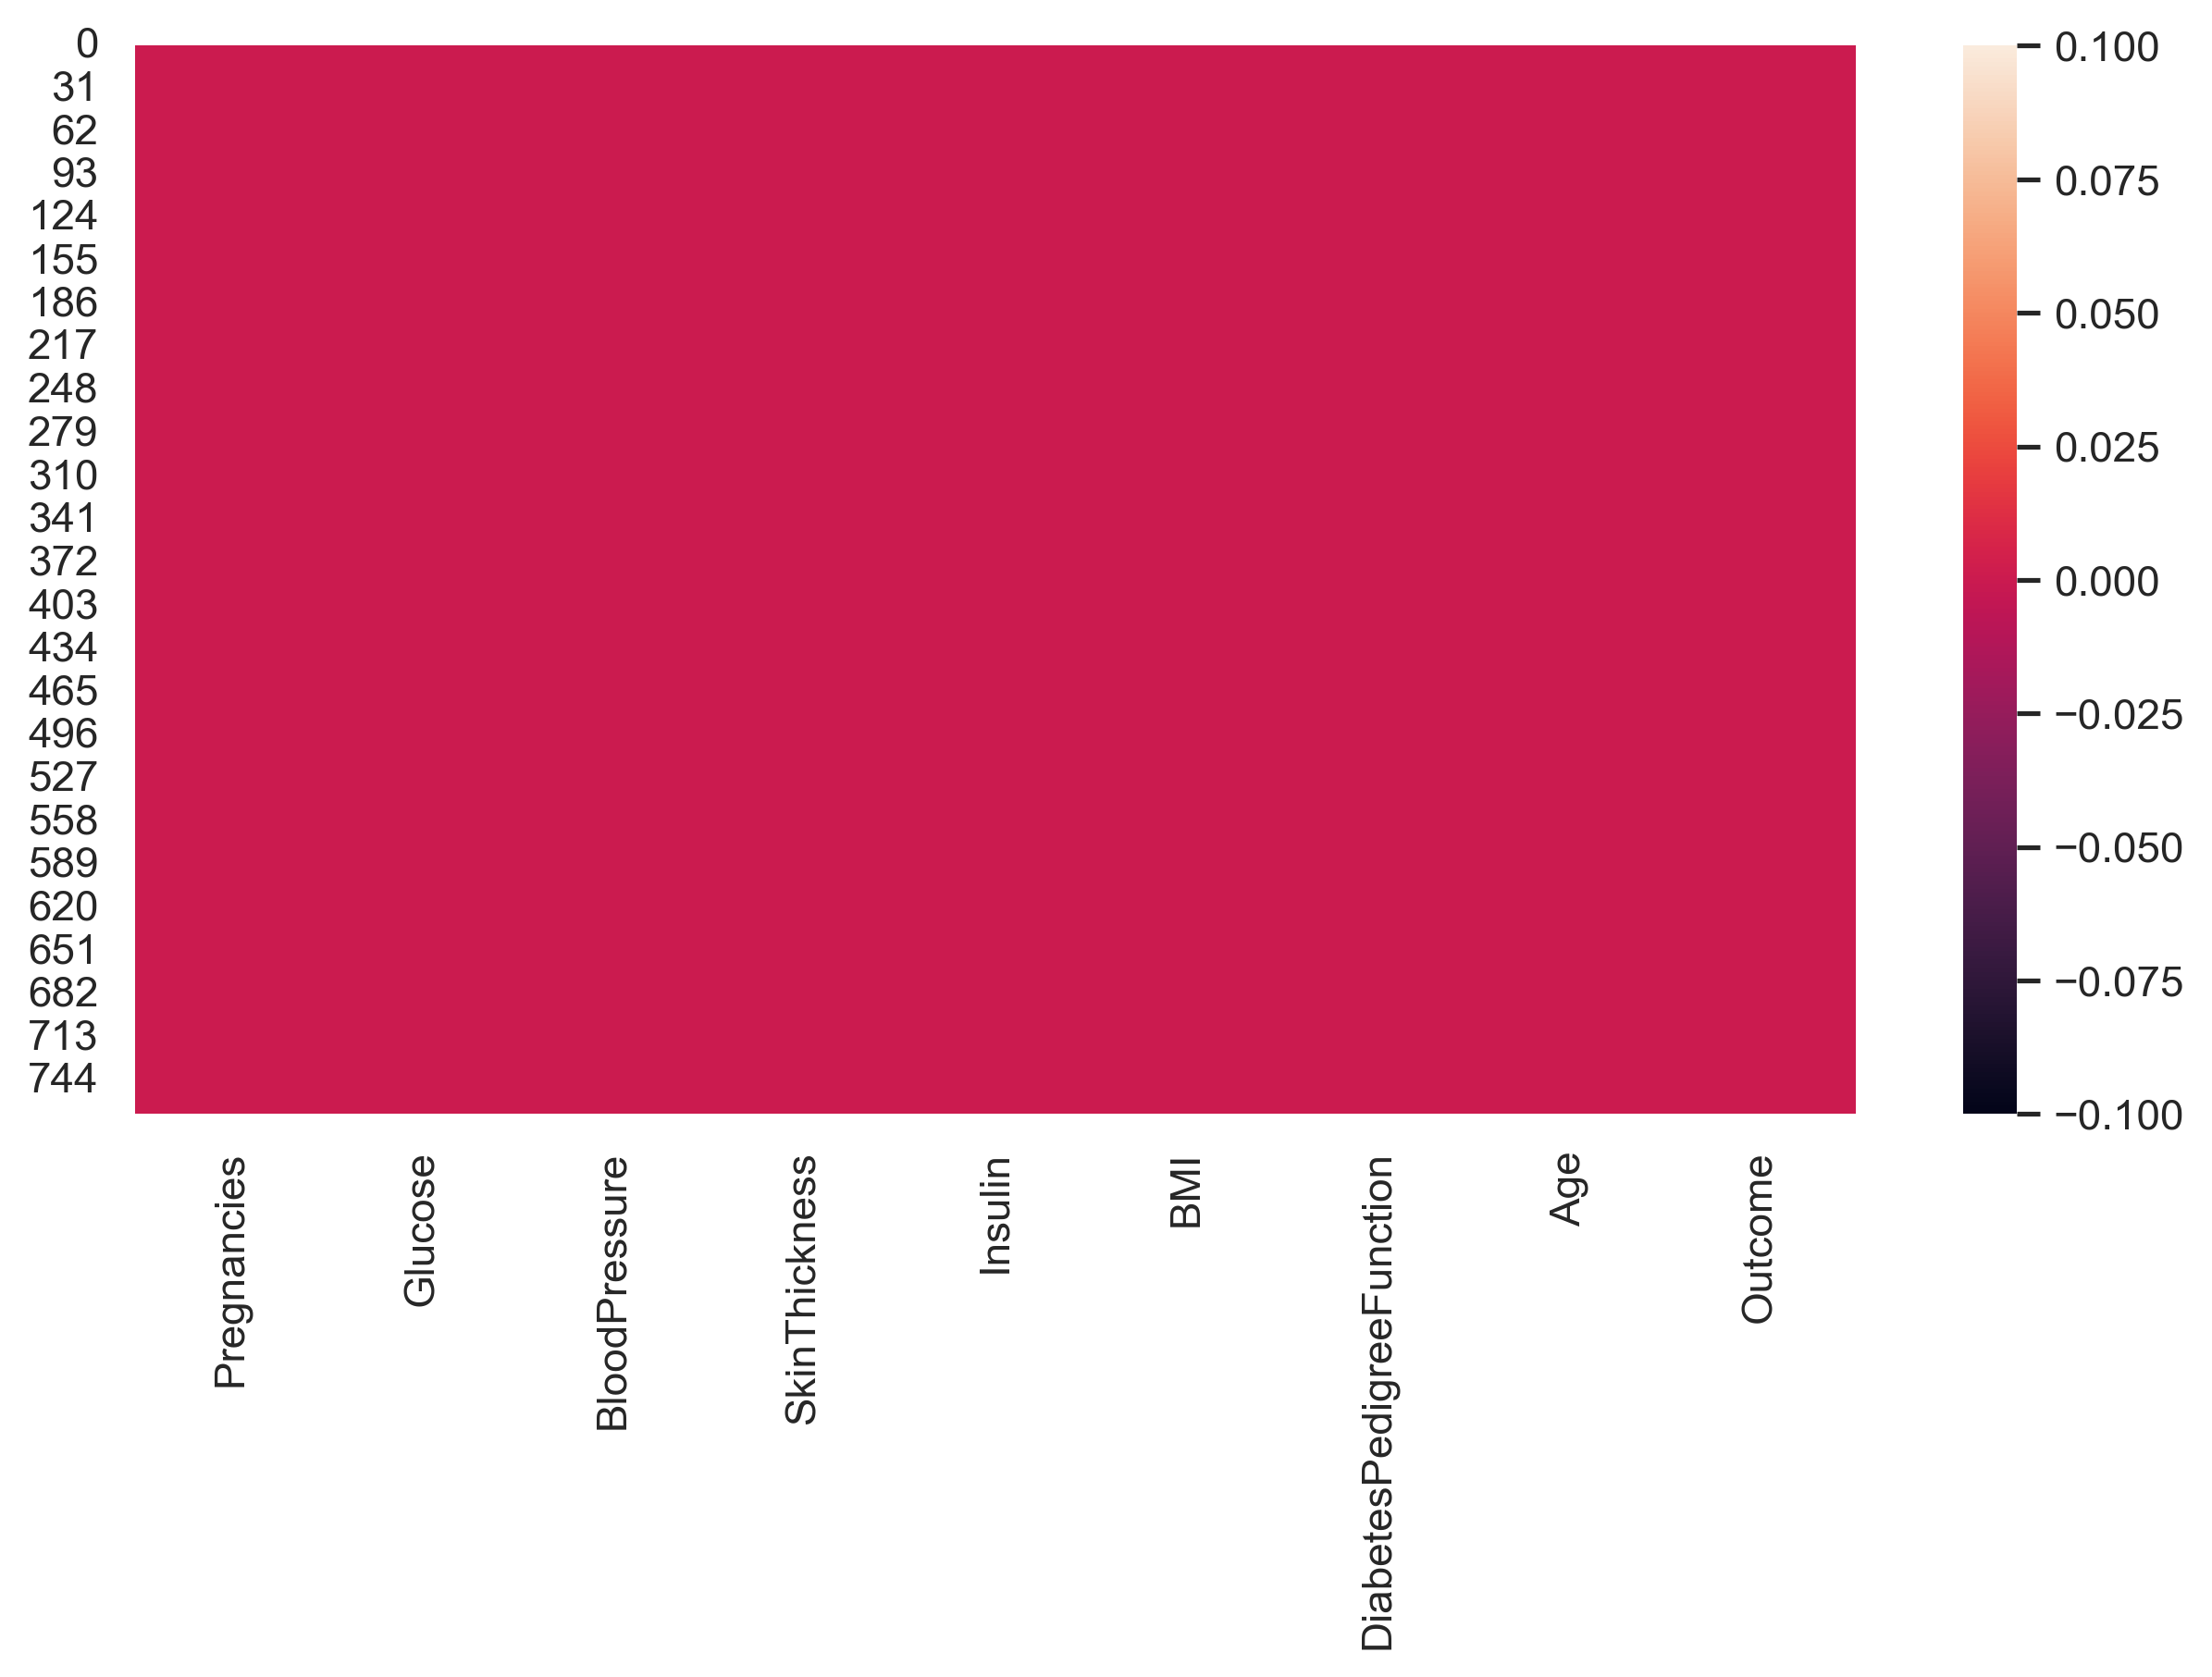

In [12]:
sns.heatmap(df.isna())

# Model building

In [13]:
x = df.iloc[:,:-1]
y = df['Outcome']

In [4]:
#Feature scaling

In [14]:
sc = StandardScaler()

In [15]:
x = sc.fit_transform(x)
x

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
ypred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [19]:
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(0.8436482084690554, 0.7792207792207793)

# Hyperparameter Tuning for knn

In [20]:
trainac = []
testac = []

for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

In [21]:
trainac

[1.0,
 0.8338762214983714,
 0.8436482084690554,
 0.8127035830618893,
 0.8192182410423453,
 0.7996742671009772,
 0.7947882736156352,
 0.7947882736156352,
 0.7980456026058632,
 0.7850162866449512,
 0.7817589576547231,
 0.7785016286644951,
 0.7833876221498371,
 0.7817589576547231,
 0.7817589576547231,
 0.7671009771986971,
 0.7817589576547231,
 0.7768729641693811,
 0.7703583061889251,
 0.7687296416938111,
 0.7654723127035831,
 0.757328990228013,
 0.7638436482084691,
 0.758957654723127]

In [22]:
testac

[0.6688311688311688,
 0.7337662337662337,
 0.7792207792207793,
 0.7792207792207793,
 0.7987012987012987,
 0.7857142857142857,
 0.7922077922077922,
 0.7727272727272727,
 0.7727272727272727,
 0.7532467532467533,
 0.7922077922077922,
 0.7987012987012987,
 0.8181818181818182,
 0.7987012987012987,
 0.8051948051948052,
 0.7922077922077922,
 0.7857142857142857,
 0.7987012987012987,
 0.7792207792207793,
 0.7727272727272727,
 0.8116883116883117,
 0.7727272727272727,
 0.7857142857142857,
 0.7792207792207793]

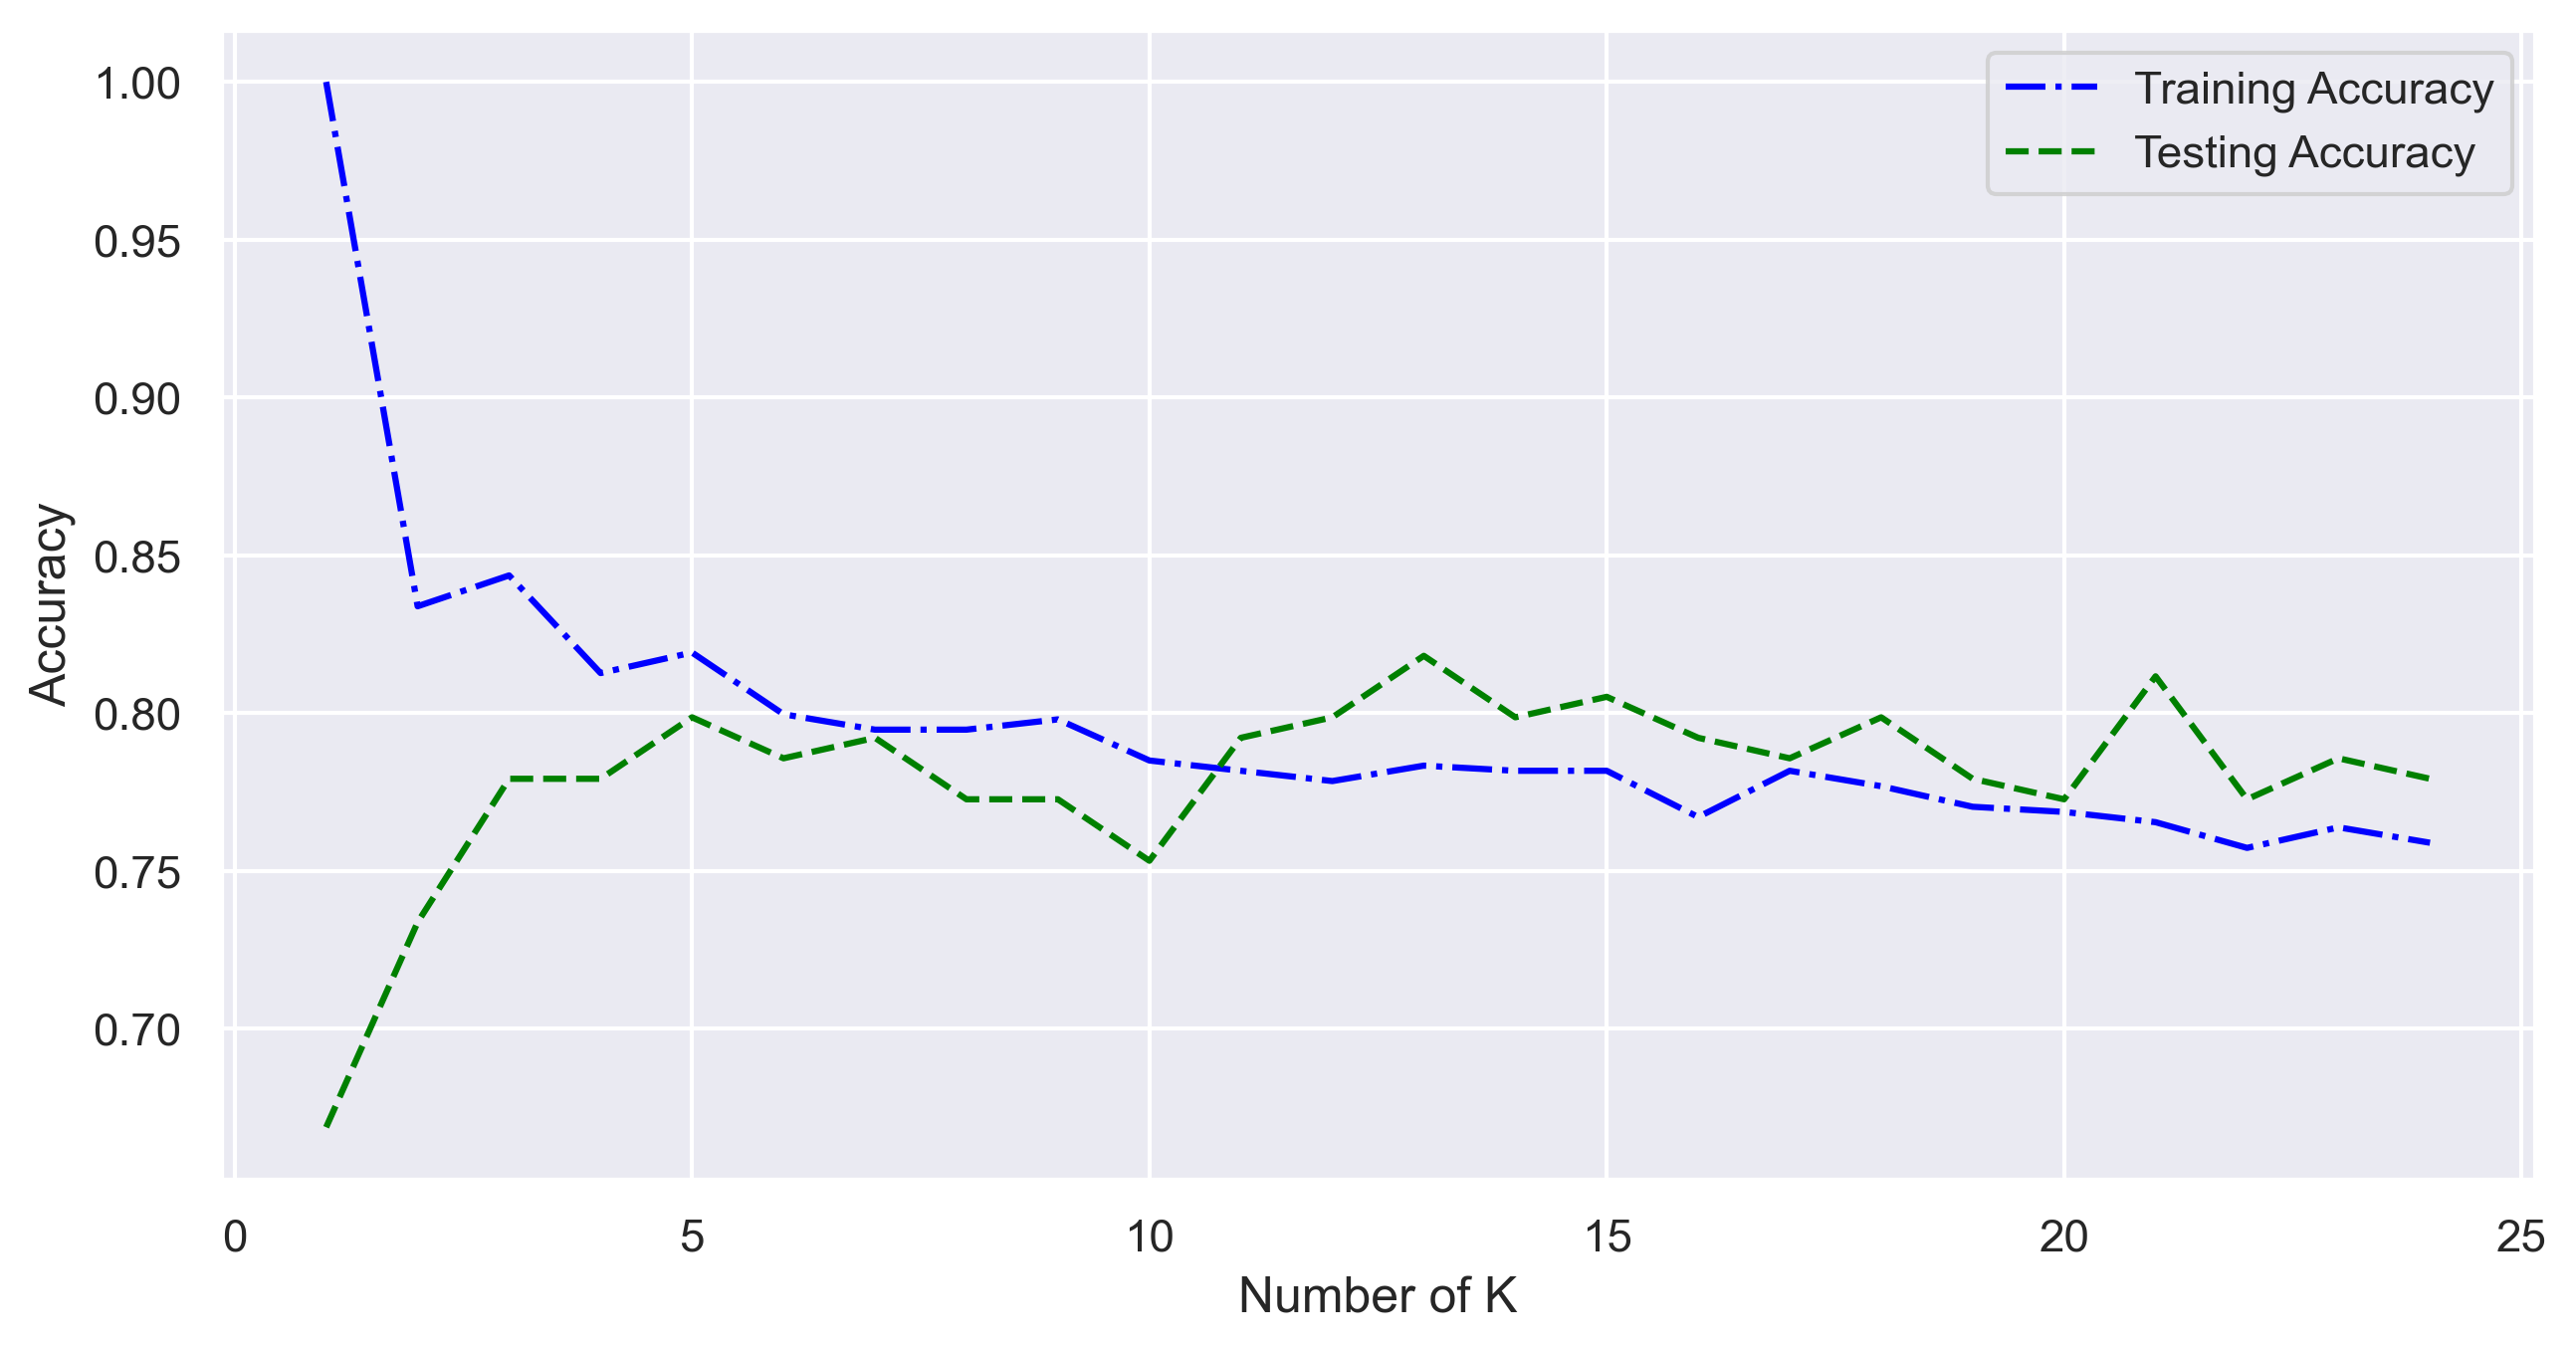

In [23]:
plt.plot(range(1,25), trainac,linestyle = '-.', color = 'blue',label = 'Training Accuracy')
plt.plot(range(1,25),testac, linestyle = '--', color = 'green', label = 'Testing Accuracy')
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.legend()

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(0.8192182410423453, 0.7987012987012987)